In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
cityfile = os.path.join('raw_data', 'city_data.csv')
ridefile = os.path.join('raw_data', 'ride_data.csv')

citydf = pd.read_csv(cityfile)
ridedf = pd.read_csv(ridefile)

citydf=citydf.drop_duplicates('city',keep='first')

In [3]:
merged_df=citydf.merge(ridedf,on='city')

color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}


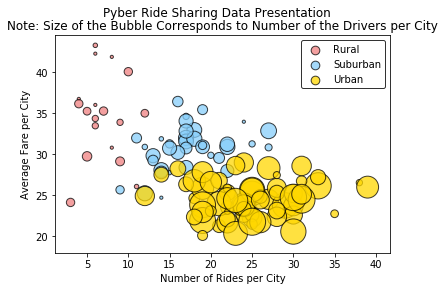

In [4]:
bycity=merged_df.groupby('city')
avgfare=bycity.mean()['fare']
ridecount=bycity['ride_id'].count()
drivercount=bycity.mean()['driver_count']
citytype=citydf.set_index('city')['type']

cityinfo=pd.DataFrame({
    "Number of Rides":ridecount,
    "Avg Fare":avgfare,
    "Number of Drivers":drivercount,
    "City Type":citytype
})

cityinfo.sort_values('Number of Drivers',ascending=False)

rural=cityinfo[cityinfo['City Type']=='Rural']
suburban=cityinfo[cityinfo['City Type']=='Suburban']
urban=cityinfo[cityinfo['City Type']=='Urban']
citycolor={'Urban':color_scheme['Gold'],'Suburban':color_scheme['Light Sky Blue'],'Rural':color_scheme['Light Coral']}

plt.suptitle('Pyber Ride Sharing Data Presentation')

plt.scatter(rural['Number of Rides'],rural['Avg Fare'],s=rural['Number of Drivers']*10,color=citycolor['Rural'],edgecolor='black',label='Rural',alpha=.75)
plt.scatter(suburban['Number of Rides'],suburban['Avg Fare'],s=suburban['Number of Drivers']*10,color=citycolor['Suburban'],edgecolor='black',label='Suburban',alpha=.75)
plt.scatter(urban['Number of Rides'],urban['Avg Fare'],s=urban['Number of Drivers']*10,color=citycolor['Urban'],edgecolor='black',label='Urban',alpha=.75)

plt.title('Note: Size of the Bubble Corresponds to Number of the Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')

lgnd=plt.legend(frameon=True,edgecolor='black')
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]

plt.show()





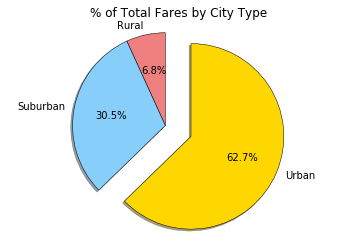

In [5]:
bytype=merged_df.groupby('type')['type','fare','ride_id','driver_count']
faresum=bytype.sum()['fare']
labels=faresum.index
colors=[citycolor[n] for n in labels]
explode=[0,0,.3]
plt.pie(faresum,startangle=90,colors=colors,explode=explode,labels=labels,autopct="%1.1f%%",shadow=True,wedgeprops={'linewidth':.5,'edgecolor':'black'})
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

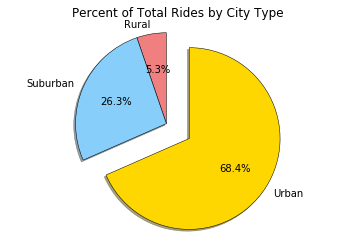

In [6]:
ridesum=bytype.count()['ride_id']
labels=ridesum.index
plt.pie(ridesum,startangle=90,explode=explode,colors=colors,labels=labels,autopct="%1.1f%%",shadow=True,wedgeprops={'linewidth':.5,'edgecolor':'black'})
plt.title('Percent of Total Rides by City Type')
plt.axis('equal')
plt.show()

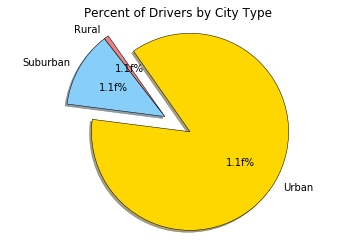

In [7]:
driversum=bytype.sum()['driver_count']
labels=driversum.index
plt.pie(driversum,startangle=125,explode=explode,colors=colors,labels=labels,autopct="1.1f%%",shadow=True,wedgeprops={'linewidth':.5,'edgecolor':'black'})
plt.title('Percent of Drivers by City Type')
plt.axis('equal')
plt.show()